In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [114]:
#Importing dataset

data = pd.read_excel("TrainDataset2023.xls")
data.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670

In [115]:
#display all columns for the head of dataset and drop ID

data = data.drop('ID', axis=1)
pd.set_option('display.max_columns', None)
data.head(10)

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,

In [116]:
data.shape

(400, 119)

In [117]:
#Understanding the data

#pCR and RelapseFreeSurvival are our target variables

#Variables ChemoGrade, Proliferation and Tumor Stage are ordinal

#Variables ER, PGR, HER2, Triple Negative, Histology Type, LNS Status are binary

#There are normalized columns (variables) given for other variables, some variables also have 10 percentile, 90 percentile and IQR values, there is also some ID values as columns 

In [118]:
#finding out columns with missing value (999)

for column in data.columns:
    if (data[column] == 999).any():
        print(f"Column {column}: contains at least one occurrence of 999.")

Column pCR (outcome): contains at least one occurrence of 999.
Column PgR: contains at least one occurrence of 999.
Column HER2: contains at least one occurrence of 999.
Column TrippleNegative: contains at least one occurrence of 999.
Column ChemoGrade: contains at least one occurrence of 999.
Column Proliferation: contains at least one occurrence of 999.
Column HistologyType: contains at least one occurrence of 999.
Column LNStatus: contains at least one occurrence of 999.


In [119]:
#replace missing value with null value

data.replace(999, pd.NA, inplace=True)

In [120]:
#finding out null values percentage for each column

missing_value = data.isnull().sum()
missing_value_percentage = (data.isnull().sum() / len(data)) * 100

for column, value in missing_value.items():
    if value != 0:
        print(f"Column {column}: has {missing_value[column]} missing values and missing value percentage is {missing_value_percentage[column]}")


Column pCR (outcome): has 5 missing values and missing value percentage is 1.25
Column PgR: has 1 missing values and missing value percentage is 0.25
Column HER2: has 1 missing values and missing value percentage is 0.25
Column TrippleNegative: has 1 missing values and missing value percentage is 0.25
Column ChemoGrade: has 3 missing values and missing value percentage is 0.75
Column Proliferation: has 2 missing values and missing value percentage is 0.5
Column HistologyType: has 3 missing values and missing value percentage is 0.75
Column LNStatus: has 1 missing values and missing value percentage is 0.25


In [121]:
#Handling missing values by dropping them since the missing percentage is very low

data = data.dropna()
data

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.000000,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.689300,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.689300,0.670258,0.

In [122]:
target_variables = ['pCR (outcome)', 'RelapseFreeSurvival (outcome)']
pcr_data = data['pCR (outcome)'] # Classlification Label
rfs_data = data['RelapseFreeSurvival (outcome)'] # Regression Label
data = data.drop(columns= target_variables, axis=1)
data

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.689300,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.689300,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.40

In [123]:
#Handling ordinal values

label_encode_columns = data.columns[5:7].tolist() + [data.columns[9]]
label_encoder = LabelEncoder()

for col in label_encode_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [124]:
#Handling binary values

onehot_encode_columns = data.columns[1:5].tolist() + data.columns[7:9].tolist()
data = pd.get_dummies(data, columns=onehot_encode_columns)
data

,Age,ChemoGrade,Proliferation,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER_0,ER_1,PgR_0,PgR_1,HER2_0,HER2_1,TrippleNegative_0,TrippleNegative_1,HistologyType_1,HistologyType_2,LNStatus_0,LNStatus_1
0,41.0,2,2,1,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.689300,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.689300,0.670

In [125]:
#min-max encode all other columns

minmax_encode_columns = ['Age'] + data.columns[10:].tolist()
scaler = MinMaxScaler()
data[minmax_encode_columns] = scaler.fit_transform(data[minmax_encode_columns])

data

,Age,ChemoGrade,Proliferation,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER_0,ER_1,PgR_0,PgR_1,HER2_0,HER2_1,TrippleNegative_0,TrippleNegative_1,HistologyType_1,HistologyType_2,LNStatus_0,LNStatus_1
0,0.318004,2,2,1,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,0.099454,0.105898,0.025910,0.149939,0.843485,0.014781,0.173167,0.025937,0.405091,0.029460,0.000676,0.809830,0.079285,0.386902,0.034601,0.000000,0.190164,0.239353,0.501810,0.078645,0.000000,0.000000,0.476243,0.000676,0.250352,0.00116

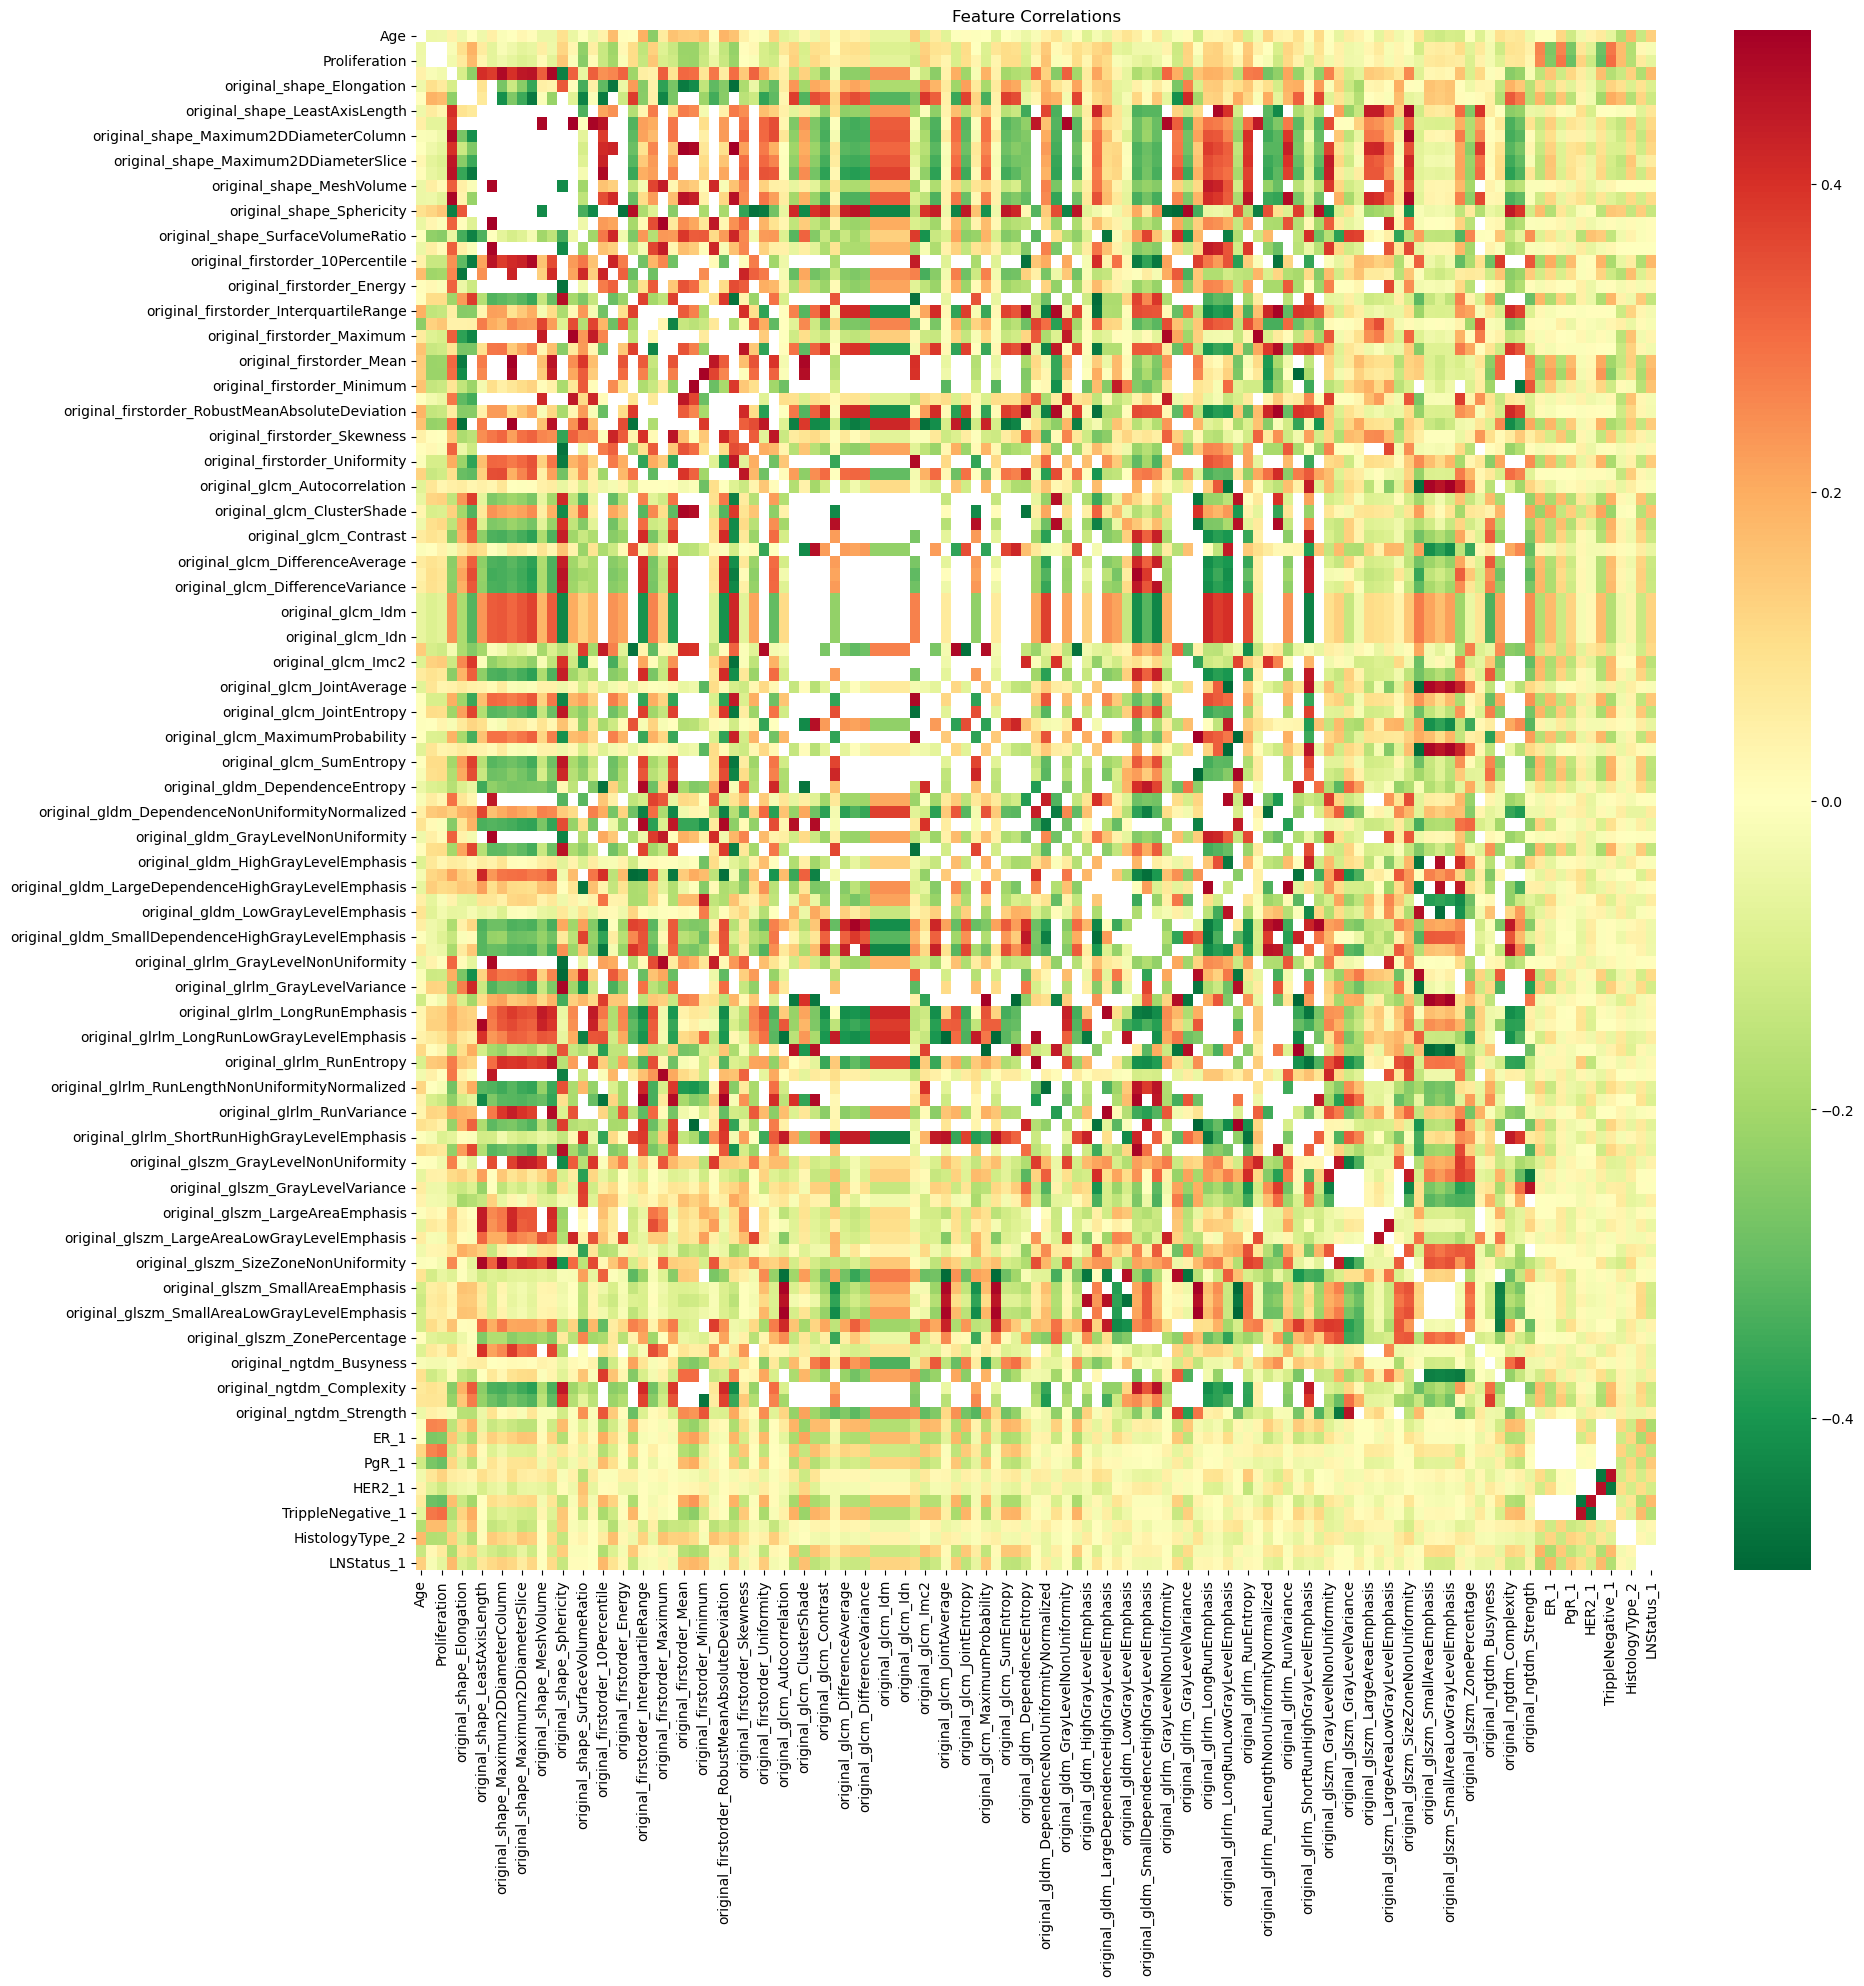

In [126]:
#Correlation between features

feature_correlation = data.corr()
feature_correlation_abs = feature_correlation.abs()

plt.figure(figsize=(20, 20))
sns.heatmap(feature_correlation, cmap='RdYlGn_r', mask = (feature_correlation_abs >= 0.5))
plt.title('Feature Correlations')
plt.show()

In [127]:
# Taking upper diagonal values
upper = feature_correlation_abs.where(np.triu(np.ones(feature_correlation_abs.shape), k=1).astype(bool))

#Then taking values (absolute) of the each element and choosing the column to drop by various correlation threshold vales
to_drop_95 = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop_90 = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop_85 = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop_80 = [column for column in upper.columns if any(upper[column] > 0.80)]

print(f'Thresholding 95% correlated drop columns : {len(to_drop_95)}')
print(f'Thresholding 90% correlated drop columns : {len(to_drop_90)}')
print(f'Thresholding 85% correlated drop columns : {len(to_drop_85)}')
print(f'Thresholding 80% correlated drop columns : {len(to_drop_80)}')

Thresholding 95% correlated drop columns : 52
Thresholding 90% correlated drop columns : 67
Thresholding 85% correlated drop columns : 80
Thresholding 80% correlated drop columns : 88


In [128]:
#Dropping columns that correlate more than 90%

data_dropped = data.drop(to_drop_90, axis=1)
data_dropped

,Age,ChemoGrade,Proliferation,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceVolumeRatio,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_Autocorrelation,original_glcm_ClusterShade,original_glcm_Correlation,original_glcm_Imc1,original_gldm_DependenceEntropy,original_gldm_DependenceVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness,original_ngtdm_Strength,ER_0,PgR_0,HER2_0,TrippleNegative_0,HistologyType_1,LNStatus_0
0,0.318004,2,2,1,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,0.099454,0.025910,0.149939,0.843485,0.173167,0.405091,0.029460,0.079285,0.386902,0.034601,0.190164,0.501810,0.476243,0.776283,0.205101,0.408587,0.787303,0.874414,0.530984,0.576952,0.249507,0.456243,0.539896,0.060429,0.044862,0.353049,0.652344,0.754467,0.044764,0.669421,0.113636,0.000273,0.000263,0.000081,0.122088,0.470791,0.672134,0.204145,0.022801,0.000661,1.0,1.0,1.0,0.0,1.0,0.0
1,0.282670,2,2,1,0.666118,0.476173,20.715461,43.504095,51.971146,41.761226,0.106965,0.025897,0.169149,0.617438,0.275973,0.621210,0.328838,0.190898,0.291942,0.220220,0.526464,0.534410,0.225202,0.978264,0.487886,0.158760,0.900483,0.331013,0.321152,0.870979,0.315241,0.487130,0.811224,0.222730,0.161126,0.494228,0.203299,0.392427,0.129890,0.950625,0.015625,0.000160,0.000160,0.000041,0.140550,0.518456,0.612873,0.496269,0.002864,0.003217,0.0,0.0,1.0,1.0,1.0,0.0
2,0.141335,1,0,1,0.645083,0.594470,21.659822,36.435505,32.984845,40.447497,0.133577,0.019566,0.122332,0.623758,0.316123,0.614035,0.261888,0.114904,0.409038,0.218491,0.438672,0.552551,0.515325,0.985030,0.500808,0.132050,0.930424,0.350919,0.285421,0.868301,0.360796,0.528451,0.863636,0.203035,0.145190,0.485831,0.180299,0.455698,0.119775,0.946676,0.016892,0.000103,0.000103,0.000026,0.223747,0.623640,0.502453,0.597166,0.001634,0.005628,1.0,1.0,1.0,0.0,1.0,1.0
3,0.212003,2,2,2,0.770842,0.501228,26.590504,53.050724,66.910388,44.944410,0.242101,0.049647,0.271034,0.444105,0.290049,0.645697,0.299571,0.194394,0.229868,0.132099,0.523079,0.591692,0.186228,0.991224,0.510557,0.123638,0.919555,0.317412,0.178126,0.887462,0.204049,0.415445,0.913373,0.257496,0.187387,0.551175,0.116984,0.348297,0.165294,0.960788,0.012376,0.000474,0.000474,0.000122,0.199380,0.590549,0.526790,0.331763,0.002257,0.003966,1.0,1.0,1.0,0.0,1.0,0.0
4,0.671342,1,0,1,0.861035,0.750267,20.456571,27.265716,33.241540,30.594117,0.084639,0.015758,0.122099,0.822724,0.245059,0.560948,0.237895,0.210715,0.187869,0.055958,0.436143,0.588306,0.200936,0.977769,0.487976,0.156211,0.911980,0.292197,0.329425,0.886466,0.363612,0.516213,0.795141,0.225007,0.162956,0.452605,0.233331,0.424704,0.092806,0.932224,0.021552,0.000084,0.000084,0.000022,0.160147,0.539329,0.567826,0.576747,0.001908,0.004911,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,..

In [129]:
#LASSO REGRESSION MODEL FOR SELECTING IMPORTANT FEATURES

X = data_dropped.values
y = pcr_data.values

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (312, 56)
Shape of Test Features: (78, 56)
Shape of Train Target: (312,)
Shape of Test Target: (78,)


In [130]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


/Users/raghavi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+01, tolerance: 5.261e-03
  model = cd_fast.enet_coordinate_descent(
/Users/raghavi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.484e+01, tolerance: 4.968e-03
  model = cd_fast.enet_coordinate_descent(
/Users/raghavi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/raghavi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+01, tolerance: 5.204e-03
  model = cd_fast.enet_coordinate_descent(


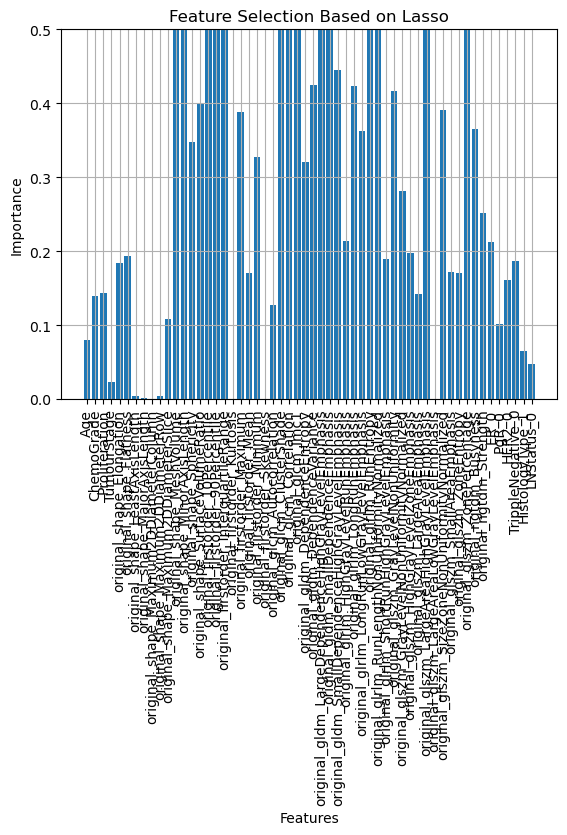

In [131]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(data_dropped.columns, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.5)
plt.show()

In [132]:
# Subsetting the features which has more than 0 importance.
feature_subset = data_dropped.columns[lasso1_coef != 0]
print("Selected Feature Columns: {}".format(feature_subset))

Selected Feature Columns: Index(['Age', 'ChemoGrade', 'Proliferation', 'TumourStage',
       'original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceVolumeRatio', 'original_firstorder_10Percentile',
       'original_firstorder_90Percentile',
       'original_firstorder_InterquartileRange', 'original_firstorder_Maximum',
       'original_firstorder_Mean', 'original_firstorder_Minimum',
       'original_glcm_Autocorrelation', 'original_glcm_ClusterShade',
       'original_glcm_Correlation', 'original_glcm_Imc1',
       'original_gldm_DependenceEntropy', 'original_gldm_DependenceVariance',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis'

In [133]:
# Subsetting the features which has more than 0 importance.
feature_subset = data_dropped.columns[lasso1_coef > 0.01]
print("Selected Feature Columns: {}".format(feature_subset))

Selected Feature Columns: Index(['Age', 'ChemoGrade', 'Proliferation', 'TumourStage',
       'original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_Maximum2DDiameterSlice', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceVolumeRatio', 'original_firstorder_10Percentile',
       'original_firstorder_90Percentile',
       'original_firstorder_InterquartileRange', 'original_firstorder_Maximum',
       'original_firstorder_Mean', 'original_firstorder_Minimum',
       'original_glcm_Autocorrelation', 'original_glcm_ClusterShade',
       'original_glcm_Correlation', 'original_glcm_Imc1',
       'original_gldm_DependenceEntropy', 'original_gldm_DependenceVariance',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_glrlm_HighGrayLevelRunEmphasis',
       'o